# Principal Component Analysis

In [81]:
%matplotlib inline

In [82]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [83]:
sns.set(style='white')

In [84]:
d1 = pd.read_csv('data/data1.csv', sep=';', header=None)
print('rows, columns:', d1.shape)
d1.head()

rows, columns: (45294, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.1165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,745.7500
1,3.3165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,6.8596
2,3.1165,3.2245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,963.6320
3,3.1165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.6056,0.8631,0.7774,0.0605,0.4959,0.2765,16.6728
4,3.1165,3.0245,2.5679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,436.2930


In [85]:
n = 13  # number of inputs
input_indices = list(range(n))
x = d1[input_indices]
y = d1[n]

## Funkční hodnoty

Popisné statistiky

In [86]:
y.min()

0.079799999999999996

In [87]:
y.max()

104797.0

In [88]:
y.mean()

7.6842392789331919

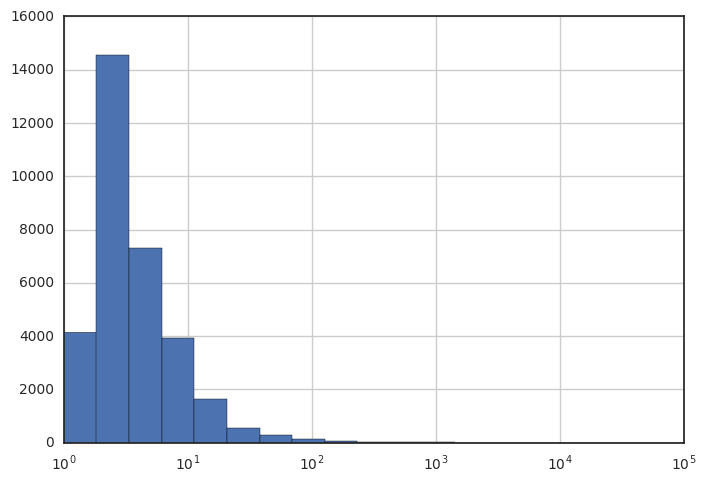

In [89]:
y.hist(bins=np.logspace(0, 5, 20))
plt.gca().set_xscale('log')

Téměř všechny funkční hodnoty jsou menší než 100, ale je tam i pár větších, a právě ty nás zajímají. Podívejme se tedy na histogram funkčních hodnot větších než 100, těch už jsou řádově jen desítky.

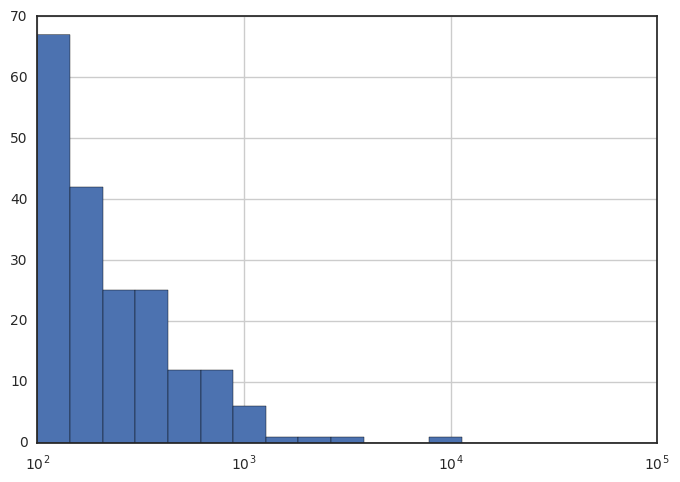

In [90]:
y.hist(bins=np.logspace(2, 5, 20))
plt.gca().set_xscale('log')

## PCA

In [91]:
pca = PCA(n_components=2)
x_reduced = pd.DataFrame(pca.fit_transform(x))

In [92]:
print('rows, columns:', x_reduced.shape)
print('principal components:', pca.components_)
x_reduced.head()

rows, columns: (45294, 2)
principal components: [[ 0.97967671 -0.01141517 -0.04243101 -0.02972266 -0.05067792  0.11648167
  -0.03929353 -0.07062242  0.01083162 -0.08403049 -0.05129785 -0.06944492
   0.01091607]
 [ 0.13862607  0.30127926  0.32793795  0.50942608  0.33138219 -0.1645847
   0.18030472  0.2904765   0.3636448   0.2982717   0.09231969  0.19830397
  -0.01075999]]


,0,1
0,1.366106,0.848025
1,1.562041,0.875751
2,1.363823,0.908281
3,1.351981,0.906121
4,1.357619,0.913613


In [93]:
d = pd.concat([x_reduced, y], axis=1)
d.columns = ['x1', 'x2', 'y']
d.head()

,x1,x2,y
0,1.366106,0.848025,745.7500
1,1.562041,0.875751,6.8596
2,1.363823,0.908281,963.6320
3,1.351981,0.906121,16.6728
4,1.357619,0.913613,436.2930


## Scatter Plot

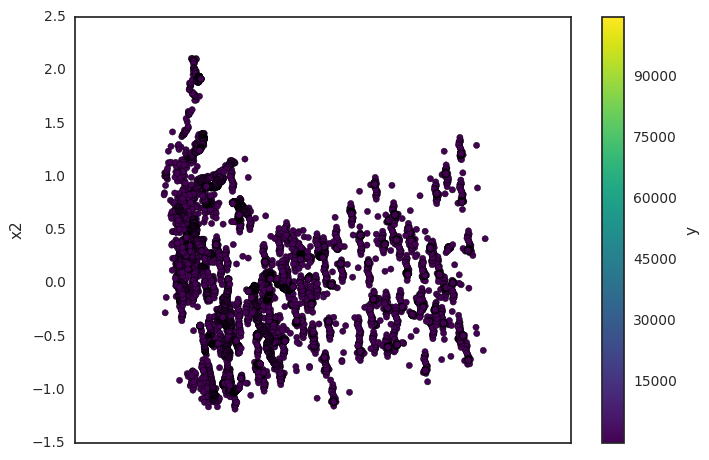

In [94]:
d.plot.scatter(x='x1', y='x2', c='y', cmap='viridis');

Příliš mnoho bodů přes sebe, není nic vidět. Těch pár vysokých bodů je zcela zakryto těmi malými. Řešením je hexbin plot!

## Hexbin Plot

<function __main__.plot_hexbin>

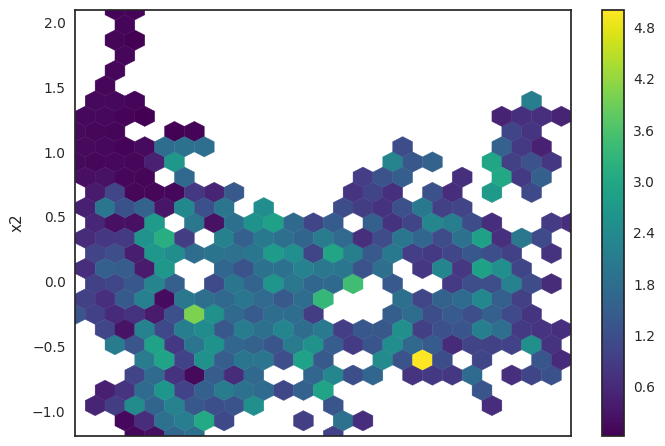

In [95]:
# todo: add interactive widget for grid size
def plot_hexbin(gridsize, logscale, maximum):
    d.plot.hexbin(x='x1', y='x2', C='y',
                  bins='log' if logscale else None,
                  gridsize=gridsize,
                  reduce_C_function=np.max if maximum else np.mean,
                  cmap='viridis')

gridsize = widgets.IntSlider(min=10, max=100, step=5, value=25, description='grid size')
widgets.interact(plot_hexbin, gridsize=gridsize, logscale=True, maximum=True)
# assumes we are intersted in maximization